In [1]:
import numpy as np
import subprocess
import matplotlib.pyplot as plt



ModuleNotFoundError: No module named 'numpy'

In [2]:
subprocess.run("pwd")

/Users/jeppegrejspetersen/Code/HPPC/hpc_course_fork/module1/jeppe/frequncy_script


CompletedProcess(args='pwd', returncode=0)

Running command: ./SIR 9950 50 0 0.2 0.1 100 1e-06 SIR_S9950_I50_R0_b0.2_g0.1_it100_dt1e-06.txt


Text(0, 0.5, 'Number of individuals')

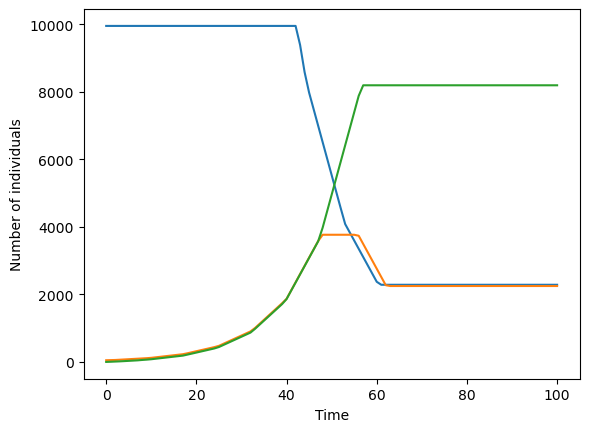

In [ ]:
run_dt_name = run_terminal_command(9950,50,0,0.2,0.1,100, 1e-6)
run_dt = np.genfromtxt(run_dt_name)
plt.plot(run_dt[:,0], run_dt[:,1], label="Susceptible")
plt.plot(run_dt[:,0], run_dt[:,2], label="Infected")
plt.plot(run_dt[:,0], run_dt[:,3], label="Recovered")
plt.xlabel("Time")
plt.ylabel("Number of individuals")

In [3]:
def run_terminal_command(S, I, R, beta, gamma, iter, dt, ):
    save_name = f"SIR_S{S}_I{I}_R{R}_b{beta}_g{gamma}_it{iter}_dt{dt}.txt"
    command = f"./SIR {S} {I} {R} {beta} {gamma} {iter} {dt} {save_name}"
    print("Running command:", command)
    subprocess.run(command, shell=True, capture_output=True, text=True)
    return save_name

In [4]:
run_dt_1_name = run_terminal_command(9950,50,0,0.2,0.1,10, 0.1)
run_dt_1 = np.genfromtxt(run_dt_1_name)
run_dt_0_5_name = run_terminal_command(9950,50,0,0.2,0.1,10, 0.1/2)
run_dt_0_5 = np.genfromtxt(run_dt_1_name)

Running command: ./SIR 9950 50 0 0.2 0.1 10 0.1 SIR_S9950_I50_R0_b0.2_g0.1_it10_dt0.1.txt
Running command: ./SIR 9950 50 0 0.2 0.1 10 0.05 SIR_S9950_I50_R0_b0.2_g0.1_it10_dt0.05.txt


In [5]:
print(#shape of the data
    run_dt_1.shape,
    run_dt_0_5.shape,
)

(101, 4) (101, 4)


In [6]:
def error(data, data_0_5):
    ## skip first dimension
    dat = data[:,1:]
    dat_0_5 = data_0_5[:,1:]
    err = np.abs(dat - dat_0_5)
    return np.max(err)


In [7]:
error(run_dt_1, run_dt_0_5)

np.float64(0.0)

## i will run for 10 days for each dt, and then 100 time steps. I dont need the data to be converged

In [10]:
## make a log linspace from 1 to 1e-6
dts = np.logspace(0, -6, num=7) ## there is a bug when dt is not a power of 10, but will let it be for now
ers = []
for dt in dts:
    run_dt_name = run_terminal_command(9950,50,0,0.2,0.1,100, dt)
    run_dt = np.genfromtxt(run_dt_name)
    rund_dt_0_5_name = run_terminal_command(9950,50,0,0.2,0.1,100, dt/2)
    run_dt_0_5 = np.genfromtxt(rund_dt_0_5_name)
    print(#shape of the data
        run_dt.shape,
        run_dt_0_5.shape,
        )
    if run_dt.shape != run_dt_0_5.shape:
        print("Error: shapes do not match")
        break
    er = error(run_dt, run_dt_0_5)
    ers.append(er)

Running command: ./SIR 9950 50 0 0.2 0.1 100 1.0 SIR_S9950_I50_R0_b0.2_g0.1_it100_dt1.0.txt
Running command: ./SIR 9950 50 0 0.2 0.1 100 0.5 SIR_S9950_I50_R0_b0.2_g0.1_it100_dt0.5.txt
(101, 4) (101, 4)
Running command: ./SIR 9950 50 0 0.2 0.1 100 0.1 SIR_S9950_I50_R0_b0.2_g0.1_it100_dt0.1.txt
Running command: ./SIR 9950 50 0 0.2 0.1 100 0.05 SIR_S9950_I50_R0_b0.2_g0.1_it100_dt0.05.txt
(101, 4) (101, 4)
Running command: ./SIR 9950 50 0 0.2 0.1 100 0.01 SIR_S9950_I50_R0_b0.2_g0.1_it100_dt0.01.txt
Running command: ./SIR 9950 50 0 0.2 0.1 100 0.005 SIR_S9950_I50_R0_b0.2_g0.1_it100_dt0.005.txt
(101, 4) (101, 4)
Running command: ./SIR 9950 50 0 0.2 0.1 100 0.001 SIR_S9950_I50_R0_b0.2_g0.1_it100_dt0.001.txt
Running command: ./SIR 9950 50 0 0.2 0.1 100 0.0005 SIR_S9950_I50_R0_b0.2_g0.1_it100_dt0.0005.txt
(101, 4) (101, 4)
Running command: ./SIR 9950 50 0 0.2 0.1 100 0.0001 SIR_S9950_I50_R0_b0.2_g0.1_it100_dt0.0001.txt
Running command: ./SIR 9950 50 0 0.2 0.1 100 5e-05 SIR_S9950_I50_R0_b0.2_g0.

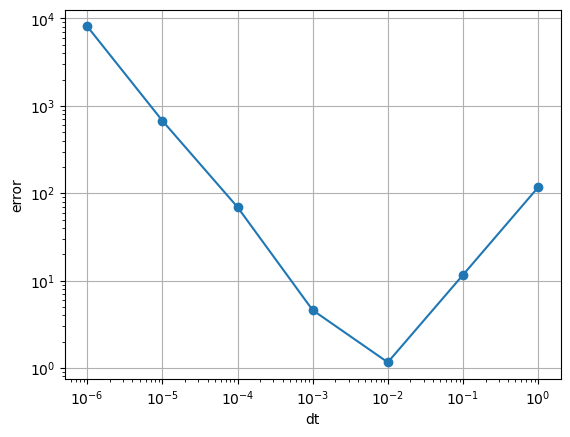

In [11]:
plt.plot(dts, ers, marker="o")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("dt")
plt.ylabel("error")
plt.grid()